In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB    #for using the Multinomial Naive Bayes Classifier Model 
from sklearn.model_selection import train_test_split  

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import wordnet

In [3]:
#downloading necessary data from NLTK
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to C:\Users\Yash
[nltk_data]     Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yash Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
data = pd.read_csv('bbc_text_cls.csv')

In [5]:
data.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
X = data['text'] #variables
Y = data['labels'] #labels

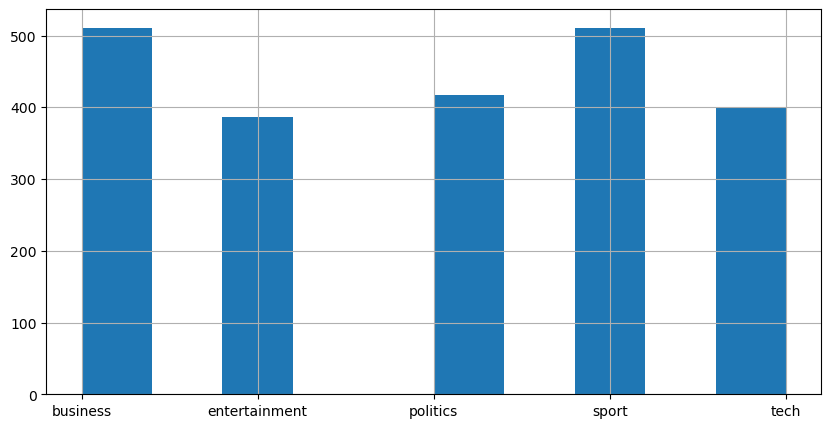

In [7]:
Y.hist(figsize=(10,5)); #shows the data is balanced

In [8]:
train,test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [9]:
vectorizer = CountVectorizer()

In [10]:
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)

In [11]:
#now the text has been converted into numbers and vectors in the form of sparse matrix
X_train  

<1668x26080 sparse matrix of type '<class 'numpy.int64'>'
	with 337714 stored elements in Compressed Sparse Row format>

In [12]:
(X_train!=0).sum() #gives the total number of non zero numbers in the sparse matrix

337714

In [13]:
X_train.shape #gives the number of rows and columns

(1668, 26080)

In [14]:
np.prod(X_train.shape) #gives product ie rows*columns which is total number of elements

43501440

In [15]:
#what percentage of values are non-zero
(X_train!=0).sum()/np.prod(X_train.shape)

0.0077632832384399225

In [16]:
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)

MultinomialNB()

In [17]:
print("train score:",classifier.score(X_train,Y_train))
print("test score:",classifier.score(X_test,Y_test)) 
#this is the score we got without applying stopwords or lemmatizing or stemming

train score: 0.9952038369304557
test score: 0.9730700179533214


In [18]:
#with stopwords
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)
print("train score:",classifier.score(X_train,Y_train))
print("test score:",classifier.score(X_test,Y_test))

train score: 0.9952038369304557
test score: 0.9748653500897666


In [19]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc) #tokenization
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word,pos=get_wordnet_pos(tag))\
                for word,tag in words_and_tags]
    

In [21]:
#with Lemmatizer
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)
print("train score:",classifier.score(X_train,Y_train))
print("test score:",classifier.score(X_test,Y_test))

train score: 0.9940047961630696
test score: 0.9748653500897666


In [22]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(token) for token in tokens]

In [23]:
#with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)
print("train score:",classifier.score(X_train,Y_train))
print("test score:",classifier.score(X_test,Y_test))

train score: 0.9922062350119905
test score: 0.9766606822262118


In [24]:
def simple_tokenizer(s):
    return s.split();

In [26]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(train)
X_test = vectorizer.transform(test)
classifier = MultinomialNB()
classifier.fit(X_train,Y_train)
print("train score:",classifier.score(X_train,Y_train))
print("test score:",classifier.score(X_test,Y_test))

train score: 0.9952038369304557
test score: 0.9676840215439856


In [27]:
X_train #the size of sparse matrix differs for each of the methods

<1668x51540 sparse matrix of type '<class 'numpy.int64'>'
	with 369041 stored elements in Compressed Sparse Row format>